<a href="https://colab.research.google.com/github/YusufAbdurrahmann/heart-disease-classification/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("sample_data/heartDisease.csv")
df.head()

,Unnamed: 0,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung


# **Data Understanding**

In [211]:
print("Data Standing : ", df.shape)

Data Standing :  (303, 15)


In [212]:
df.diagnosis.value_counts()

,count
diagnosis,
Jantung,165
Normal,138


# **Data Cleaning**

In [213]:
df.isnull().sum()

,0
Unnamed: 0,0
usia,0
jenis kelamin,0
nyeri dada,0
trestbps,0
cholestoral,0
fasting blood sugar,0
restecg,0
denyut jantung,0
exang,0


In [214]:
df.duplicated().sum()

0

In [215]:
df = df.drop_duplicates()

# **Explanatory Data Analysist (EDA)**

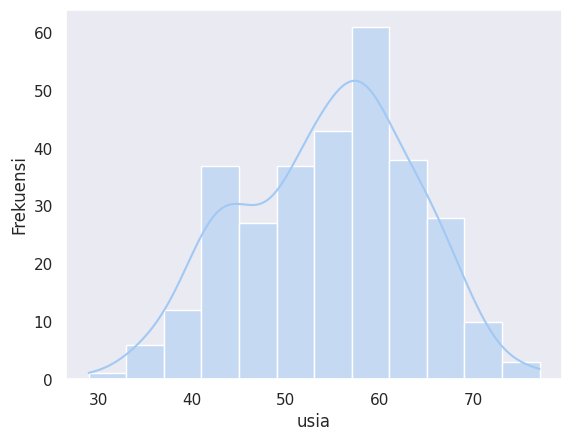

In [216]:
sns.set_theme(style="dark", palette="pastel")
sns.histplot(x="usia", data=df, kde=True)
plt.ylabel("Frekuensi")
plt.show()

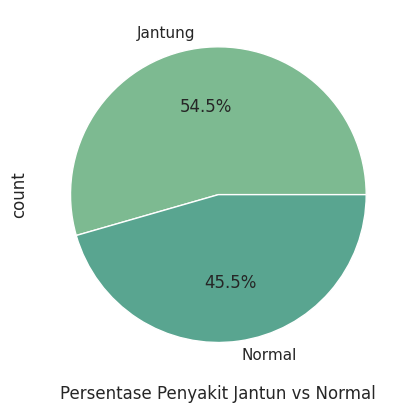

In [217]:
sns.set_palette("crest")
df['diagnosis'].value_counts().plot(kind = "pie", autopct= '%1.1f%%')
plt.xlabel("Persentase Penyakit Jantun vs Normal")
plt.show()

In [245]:
from sklearn.preprocessing import LabelEncoder

jk = LabelEncoder()
nd = LabelEncoder()
s = LabelEncoder()

df['jenis kelamin'] = jk.fit_transform(df['jenis kelamin'])
df['nyeri dada'] = nd.fit_transform(df['nyeri dada'])
df['slope'] = s.fit_transform(df['slope'])
df['diagnosis'] = df['diagnosis'].map({"Jantung" :1, "Normal" : 0})

df

,Unnamed: 0,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,0,63,0,0,145,233,1,0,150,0,2.3,2,0,1,NaN
1,1,37,0,2,130,250,0,1,187,0,3.5,2,0,2,NaN
2,2,41,1,1,130,204,0,0,172,0,1.4,0,0,2,NaN
3,3,56,0,1,120,236,0,1,178,0,0.8,0,0,2,NaN
4,4,57,1,3,120,354,0,1,163,1,0.6,0,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,1,3,140,241,0,1,123,1,0.2,1,0,3,NaN
299,299,45,0,0,110,264,0,1,132,0,1.2,1,0,3,NaN
300,300,68,0,3,144,193,1,1,141,0,3.4,1,2,3,NaN
301,301,57,0,3,130,131,0,1,115,1,1.2,1,1,3,NaN


# **Data Preperation**

In [226]:
X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

print(X.shape)
print(y.shape)

(303, 14)
(303,)


In [227]:
scaler = StandardScaler()
scaler.fit(X)
X =scaler.transform(X)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (212, 14)
y_train =  (212,)
X_test =  (91, 14)
y_test =  (91,)


# **Modelling**

In [268]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print(knn_acc)
print("Akurasi KNN : {:.2f}".format(knn_acc*100))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        41
           1       0.98      0.88      0.93        50

    accuracy                           0.92        91
   macro avg       0.92      0.93      0.92        91
weighted avg       0.93      0.92      0.92        91

0.9230769230769231
Akurasi KNN : 92.31
